In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#read csv of reviews from 2022
tiktok_rv = pd.read_csv("../Resources/tiktok_google_play_reviews.csv", low_memory = False)
tiktok_rv2 = pd.read_csv("../too_big_csv/tiktok_app_reviews.csv", low_memory = False)

In [3]:
#create new columns with date and time separate as well as year
tiktok_rv2['Dates'] = pd.to_datetime(tiktok_rv2['posted_date']).dt.date
tiktok_rv2['Time'] = pd.to_datetime(tiktok_rv2['posted_date']).dt.time
tiktok_rv2['Year'] = pd.to_datetime(tiktok_rv2['posted_date']).dt.strftime('%Y')

In [4]:
#create new columns with date and time separate as well as year
tiktok_rv['Dates'] = pd.to_datetime(tiktok_rv['at']).dt.date
tiktok_rv['Time'] = pd.to_datetime(tiktok_rv['at']).dt.time
tiktok_rv['Year'] = pd.to_datetime(tiktok_rv['at']).dt.strftime('%Y')

In [5]:
tiktok_15_21 = tiktok_rv2[['review_id','Year']].copy()

In [6]:
tiktok_22 = tiktok_rv[['reviewId','Year']].copy()

In [7]:
tiktok_15_21 = tiktok_15_21.rename(columns={"review_id": "rvID"})

In [8]:
tiktok_22 = tiktok_22.rename(columns={"reviewId": "rvID"})

In [9]:
df2 = pd.concat([tiktok_15_21, tiktok_22])

In [10]:
df2 = df2.sort_values(['Year'],
              ascending = True)

In [11]:
df2['Year'].value_counts().sort_index()

2015       9964
2016     161029
2017     193416
2018     405320
2019     934970
2020    1254268
2021     687509
2022     460287
Name: Year, dtype: int64

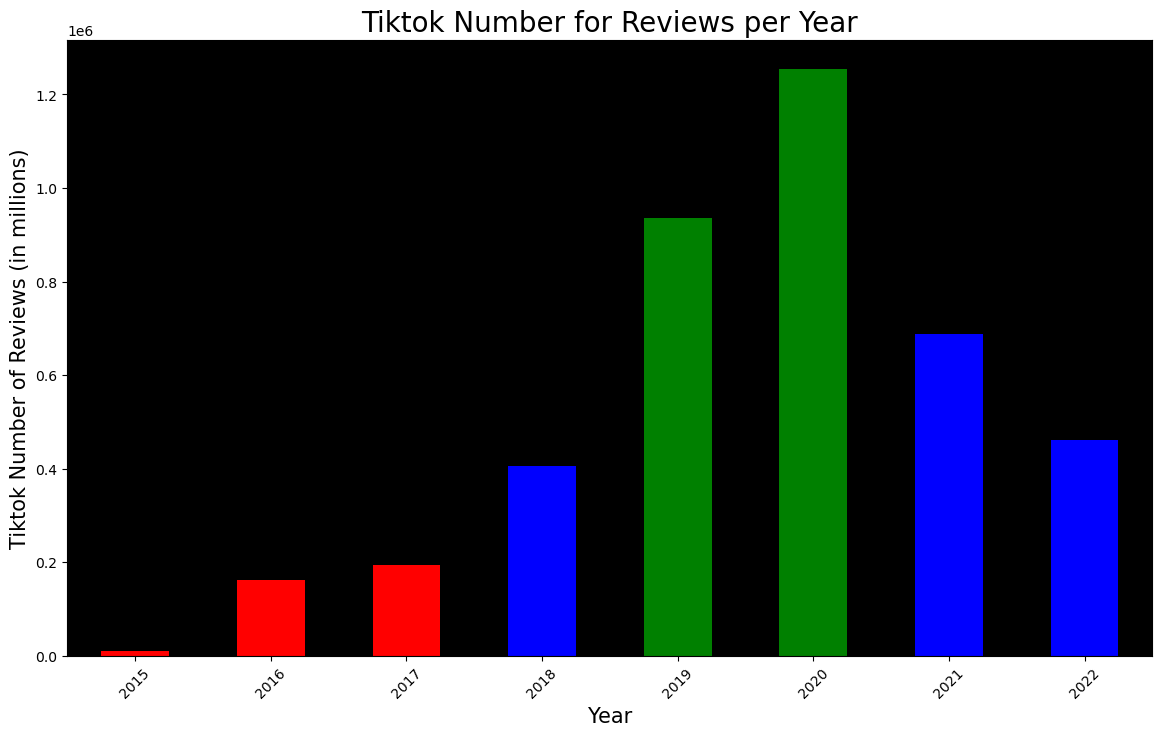

In [12]:
ax = df2['Year'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    color = ['red', 'red', 'red', 'blue', 'green', 'green', 'blue', 'blue'],
                                    rot = 45)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Tiktok Number of Reviews (in millions)", fontsize=15)
ax.set_title("Tiktok Number for Reviews per Year", fontsize=20)
ax.set_facecolor('black')

ax.figure.savefig('rv_per_year.png')


In [13]:
#there is a clear spike in 2019 and 2020 in tiktok reviews 
#then begins to dip down again once more people start leaving their homes